# Imports

In [331]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [332]:
model = HANKModelClass(name='baseline')

In [333]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

# Test Household Problem

In [334]:
# just some ad hoc parameters
par.beta = 0.96**(1/4)
ss.ra = 1.02**(1/4)-1
ss.w = 1.0
ss.L = 1.0
ss.tau = 0.10
ss.chi = 0.0

In [335]:
model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.3 secs [1007 iterations]
household problem in ss simulated in 0.2 secs [1307 iterations]


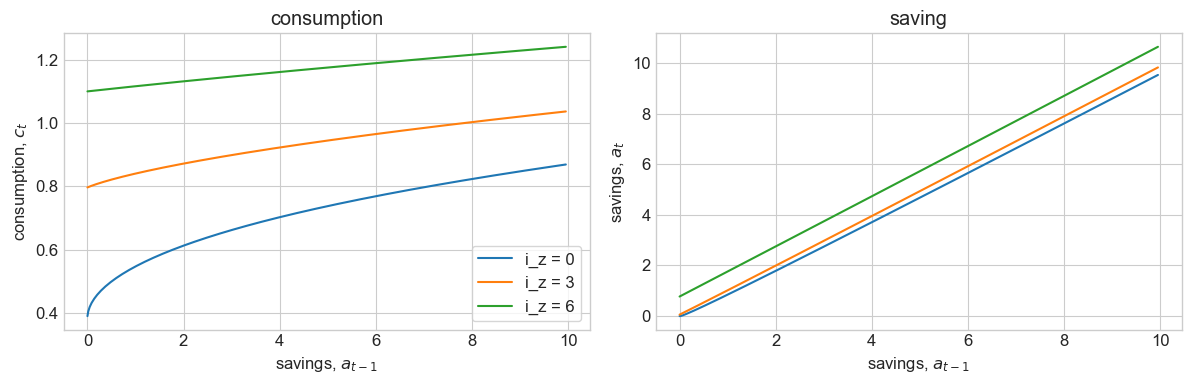

In [336]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 10

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

fig.tight_layout()

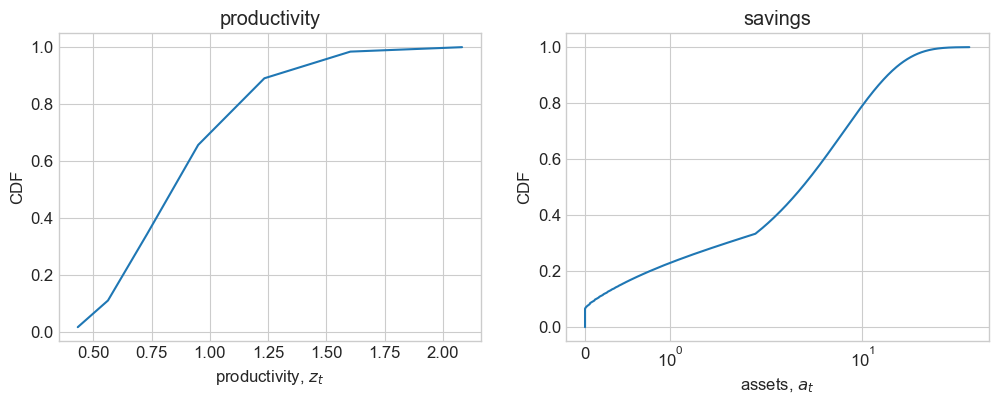

In [337]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

# Test household path

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.1 secs
household problem simulated along transition in 0.1 secs



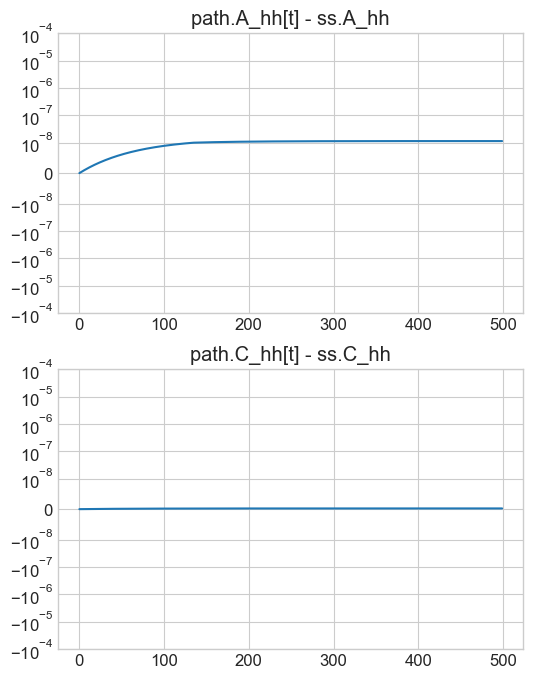

In [338]:
model.test_hh_path()

# Test steady state

In [339]:
from steady_state import obj_ss

In [340]:
beta_vec = np.linspace(0.85**(1/4),1/(1+par.r_target_ss)-1e-4,5)
clearing_A_vec = np.zeros(beta_vec.size)
for i,beta in enumerate(beta_vec):
    clearing_A_vec[i] = obj_ss(beta,model,do_print=False)
    print(f'{beta = :.3f} = {clearing_A_vec[i] = :.2f}')

beta = 0.960 = clearing_A_vec[i] = 0.79
beta = 0.969 = clearing_A_vec[i] = 0.53
beta = 0.978 = clearing_A_vec[i] = -0.10
beta = 0.986 = clearing_A_vec[i] = -2.01
beta = 0.995 = clearing_A_vec[i] = -30.47


In [341]:
model.find_ss(do_print=True)

steady state found in 3.2 secs
 r     =   0.0050
 q     =   4.8789
 qB    =   1.0000
varphi =   1.0352
beta   =   0.9767
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [342]:
model.ss.c

array([[[0.34473899, 0.34742339, 0.35013646, ..., 1.83393484,
         1.84402762, 1.85420255],
        [0.44776824, 0.45045263, 0.4531657 , ..., 1.88193378,
         1.89193785, 1.90202461],
        [0.58158896, 0.58427336, 0.58698643, ..., 1.93616734,
         1.94607463, 1.95606515],
        ...,
        [0.90335352, 0.90354135, 0.9037304 , ..., 2.06790185,
         2.07759086, 2.08736426],
        [1.05134305, 1.05146017, 1.05157854, ..., 2.14829869,
         2.15786752, 2.16752129],
        [1.19926424, 1.19935322, 1.19944307, ..., 2.24080962,
         2.25025182, 2.25977949]]])

In [343]:
model.ss.c.shape

(1, 7, 500)

In [344]:
model.path.c.shape

(500, 1, 7, 500)

In [345]:
np.mean(model.path.c[0,:,:,499])

1.5257740790185343

In [346]:
np.min(model.path.c[0,:,:,:])

0.3902523618961116

In [347]:
model.path.C_hh

array([[0.92992038, 0.92992038, 0.92992038, ..., 0.92992038, 0.92992038,
        0.92992038],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [348]:
model.path.tau

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

# Test path

In [349]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
chi            : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -3.4e-14, max abs.  2.7e-10
clearing_Y     : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
NKWC_res       : t0 =  8.7e-15, max abs.  3.8e-12
pi_w           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
q              : t0 =  0.0e+00, max abs.  0.0e+00
r              : t0 =  0.0e+00, max abs.  0.0e+00
ra             : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0

In [350]:
model.ini.L

1.0

In [351]:
model.ss.Y

1.0

In [352]:
model.path.Y

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [353]:
model.path.L

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [354]:
np.any(model.path.r[0]<0)

False

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 0.5 secs]
finding Jacobian wrt. L              : 0 125 250 375 [computed in 0.6 secs]
finding Jacobian wrt. chi            : 0 125 250 375 [computed in 0.5 secs]
finding Jacobian wrt. ra             : 0 125 250 375 [computed in 0.6 secs]
finding Jacobian wrt. tau            : 0 125 250 375 [computed in 0.6 secs]
finding Jacobian wrt. w              : 0 125 250 375 [computed in 0.5 secs]
household Jacobian computed in 3.4 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for L               in 0.3 secs
curly_Y and curly_D calculated for chi             in 0.2 secs
curly_Y and curly_D calculated for ra              in 0.2 secs
curly_Y and curly_D calculated for tau             in 0.2 secs
curly_Y and curly_D calculated for w               in 0.3 secs
curly_E calculated in 0.2 secs
builid

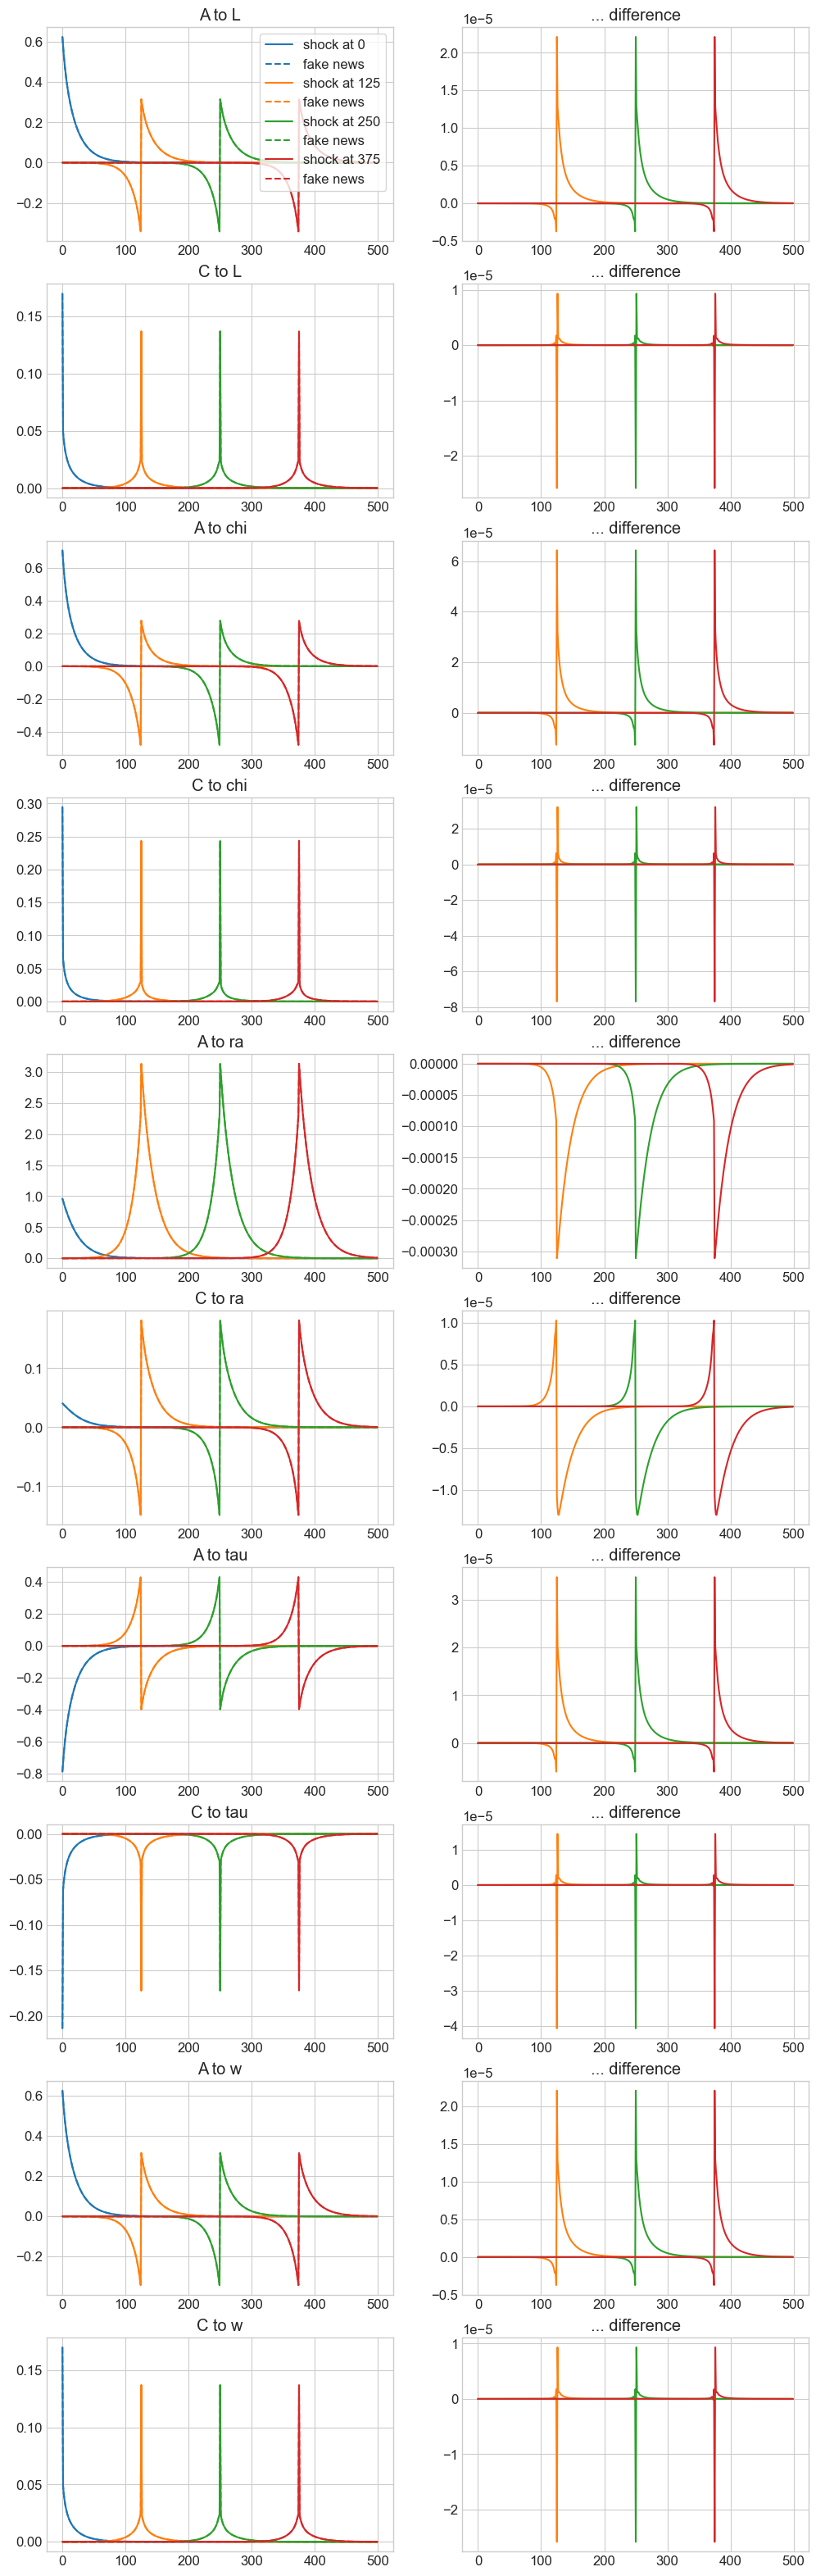

In [358]:
model.test_jacs()

# Question 1

In [359]:
model.ss.G*0.01

0.002

In [360]:
model.par.jump_G = 0.01*ss.G
model.par.rho_G = 0.8

# Just to make sure, when jumping forewards and back
model.par.jump_chi = 0.0
model.par.rho_chi = 0.0

model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.52e-02
   1.79e-03 in NKWC_res
   1.52e-02 in clearing_A
 it =   1 -> max. abs. error = 6.65e-05
   9.37e-06 in NKWC_res
   6.65e-05 in clearing_A
 it =   2 -> max. abs. error = 1.06e-06
   7.52e-08 in NKWC_res
   1.06e-06 in clearing_A
 it =   3 -> max. abs. error = 1.91e-09
   1.54e-10 in NKWC_res
   1.91e-09 in clearing_A
 it =   4 -> max. abs. error = 2.29e-12
   3.45e-13 in NKWC_res
   2.29e-12 in clearing_A

transition path found in 1.6 secs


In [ ]:
model.find_IRFs(do_print=True)

linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]


### shocks ###


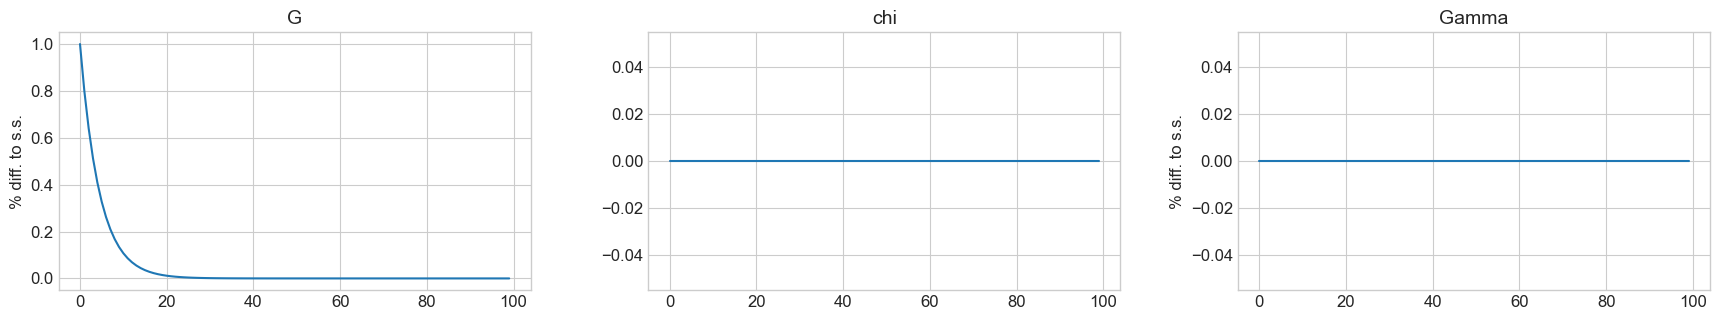


### varnames ###


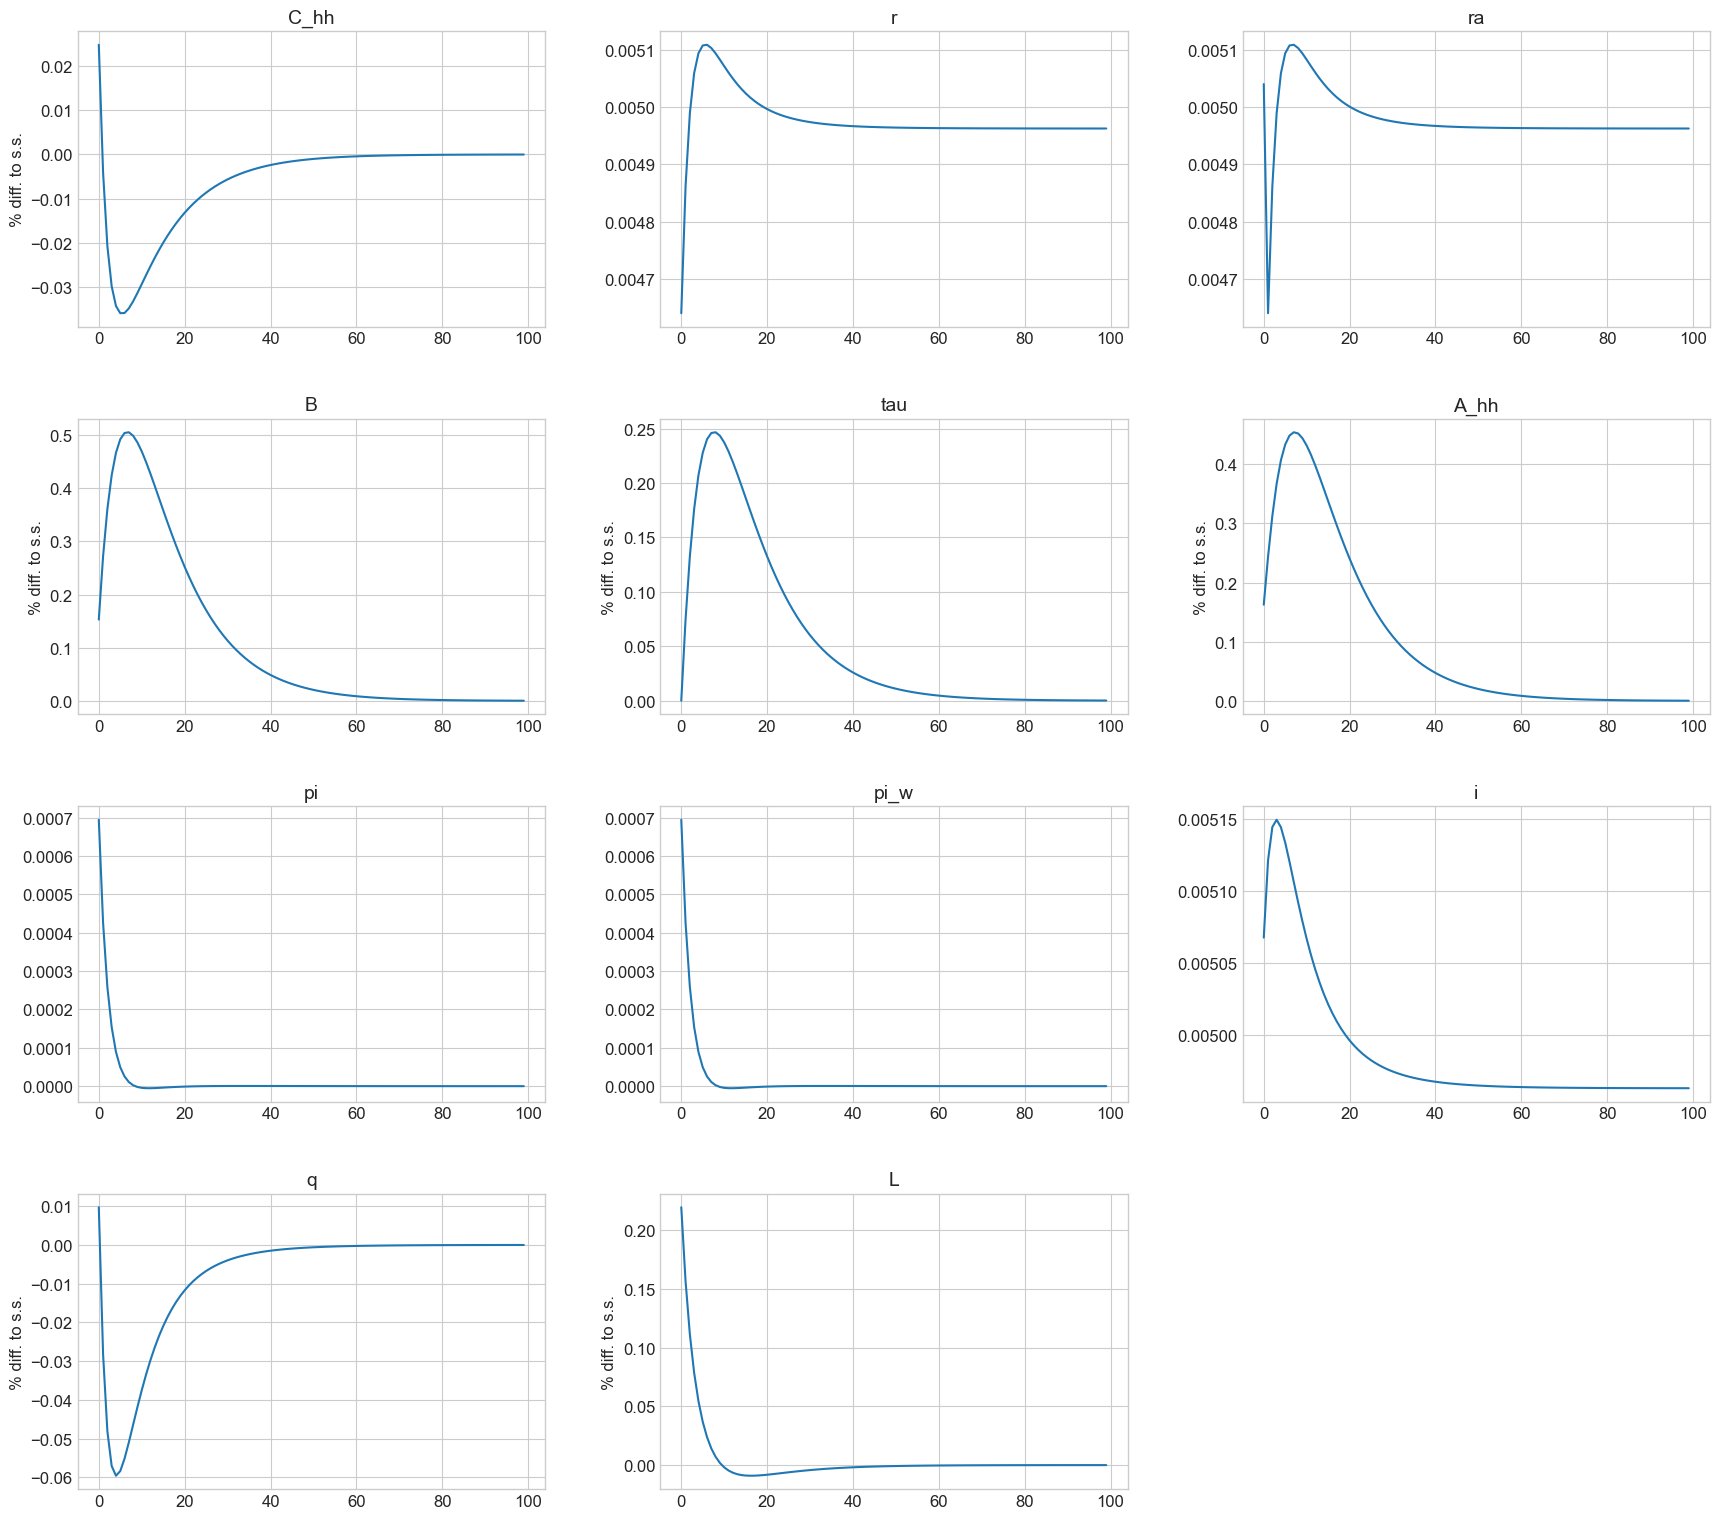


### tagets ###


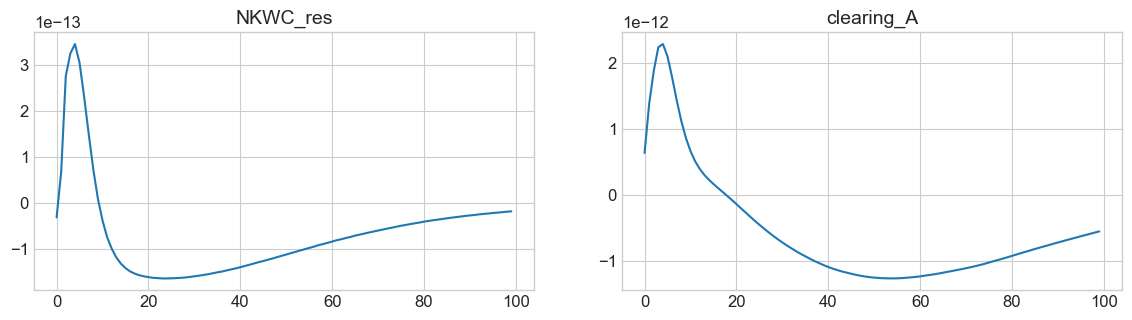

In [ ]:
paths = ['C_hh','r','ra','B','tau','A_hh','pi','pi_w','i','q','L']
#paths =['Y','A_hh','B','i','r','pi','q','C_hh','tau']
lvl_value = ['r','pi','pi_w','i','NKWC_res','clearing_A','chi','ra']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=100,ncols=3)

In [ ]:
(model.path.tau[0,0]-ss.tau)/ss.tau

0.0

In [ ]:
ss.tau

0.20496293157320383

# Question 2

### shocks ###


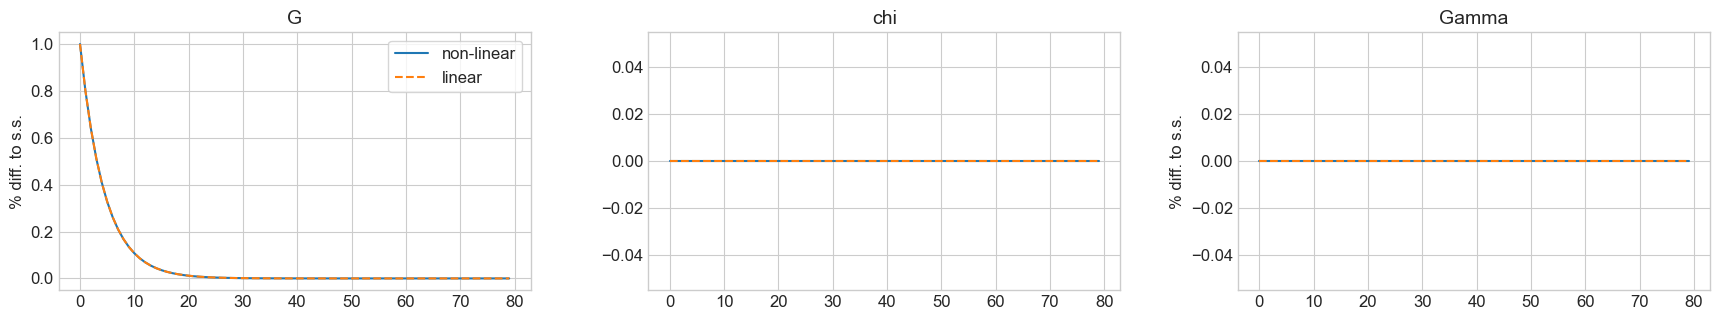


### varnames ###


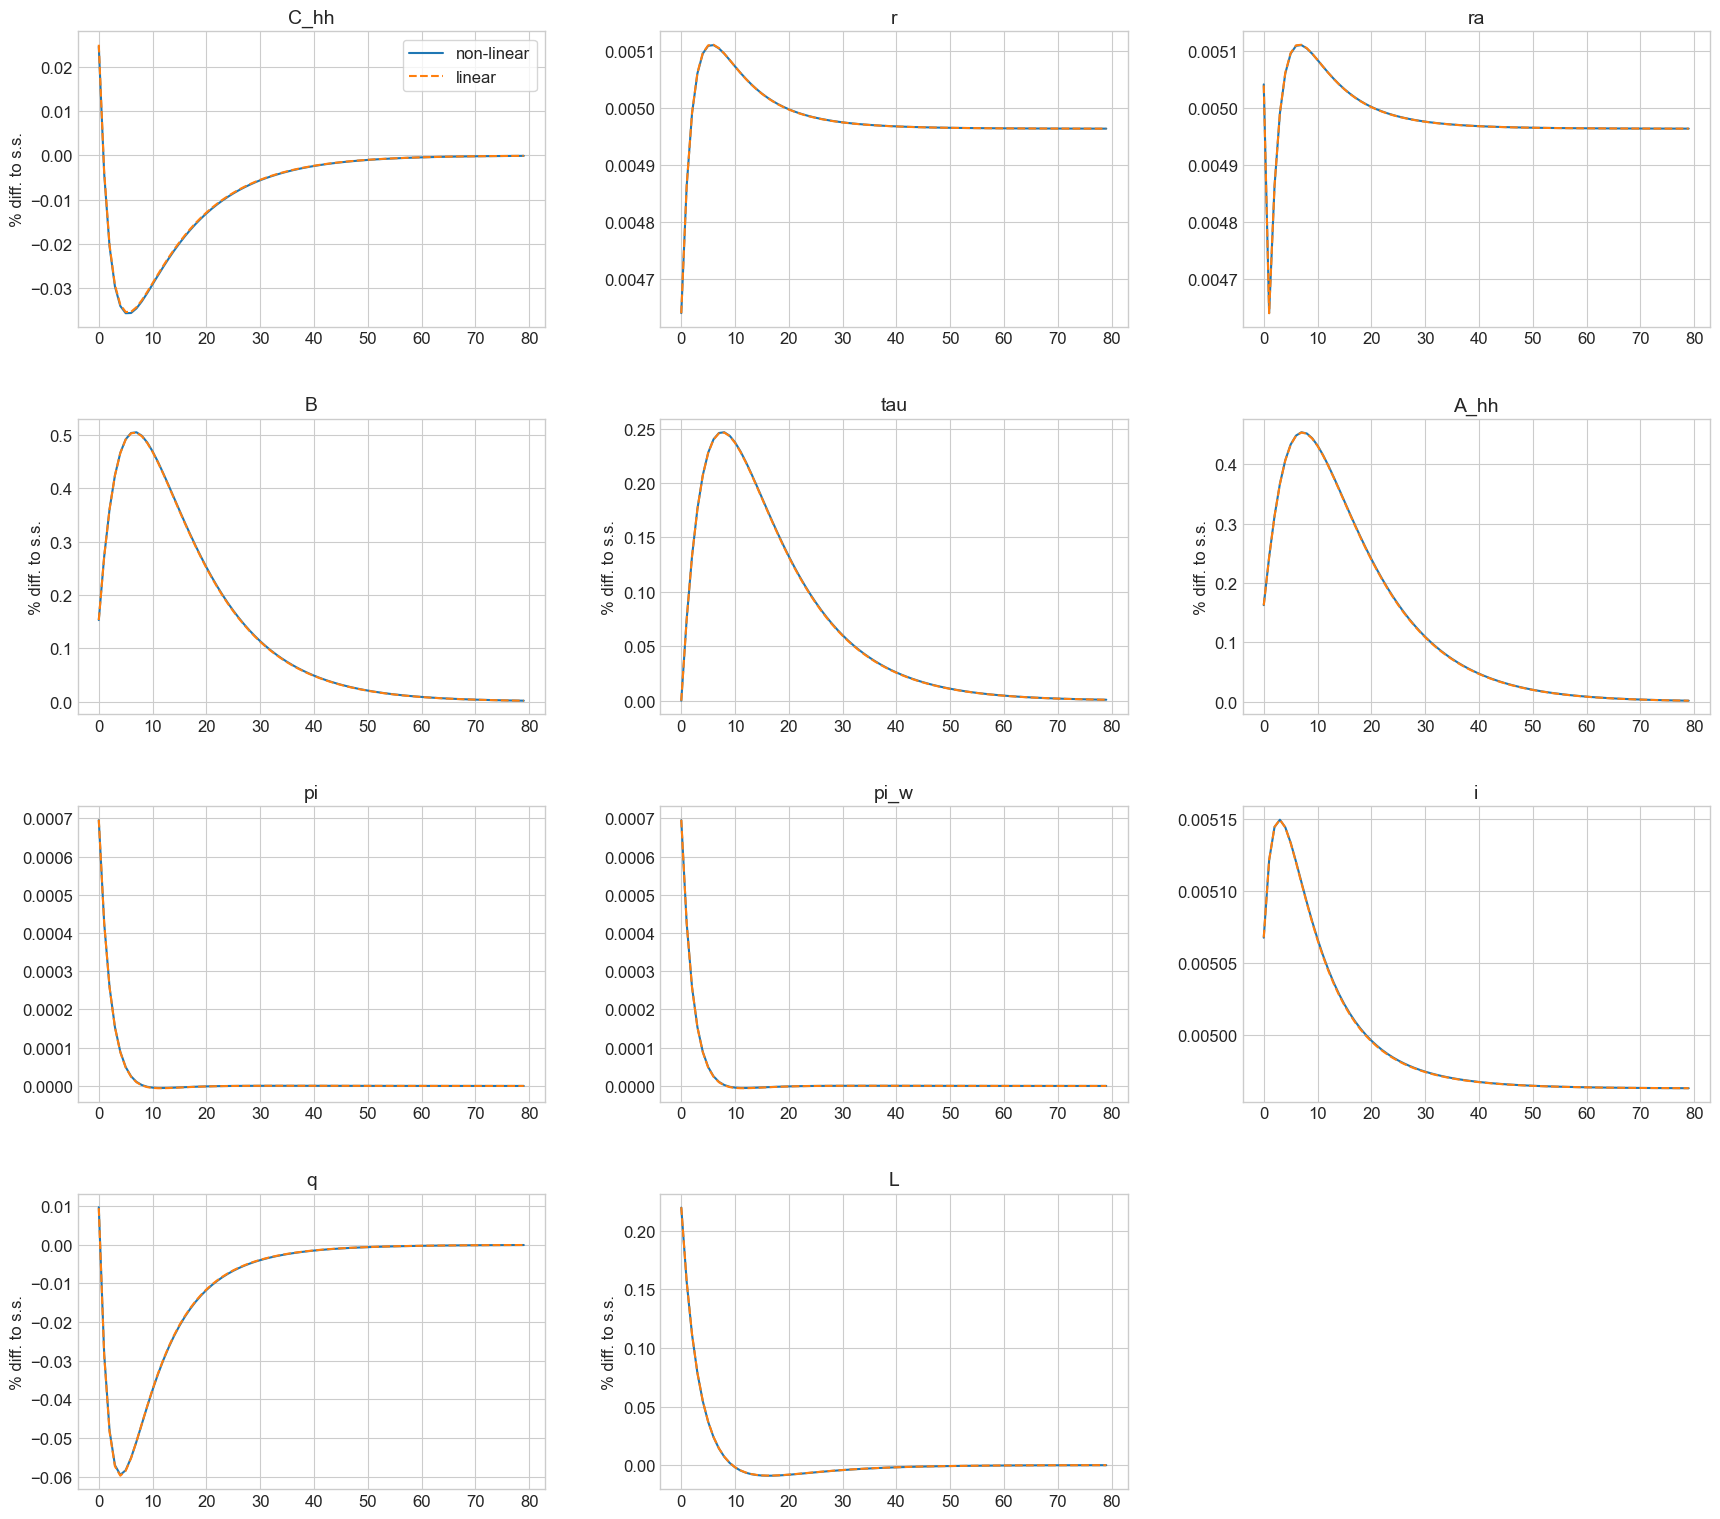


### tagets ###


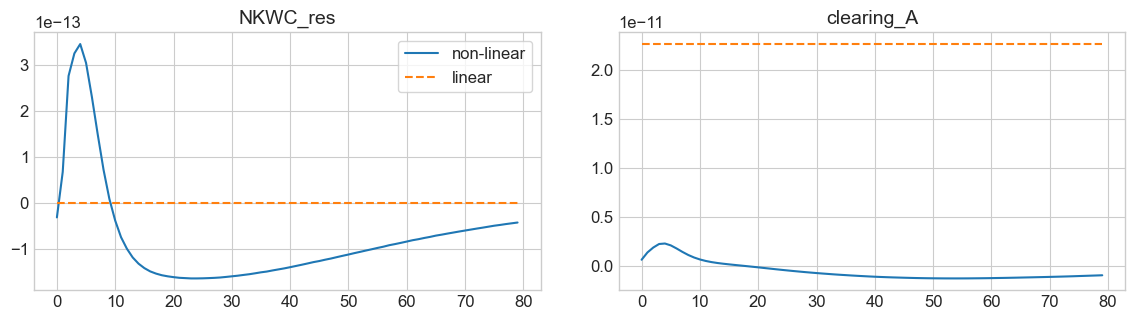

In [ ]:
model.show_IRFs(paths,do_linear=True,lvl_value=lvl_value,T_max=80,ncols=3)

# Question 3

In [ ]:
model_k = model.copy()
model_k.par.kappa = 0.5

In [ ]:
model_k.find_ss(do_print=True)

steady state found in 3.1 secs
 r     =   0.0050
 q     =   4.8789
 qB    =   1.0000
varphi =   1.0352
beta   =   0.9767
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [ ]:
model_k.compute_jacs(do_print=False)

In [ ]:
model_k.par.jump_G = 0.01*model_k.ss.G
model_k.par.rho_G = 0.8

model_k.find_transition_path(do_print=True)


finding the transition path:
 it =   0 -> max. abs. error = 1.52e-02
   8.93e-03 in NKWC_res
   1.52e-02 in clearing_A
 it =   1 -> max. abs. error = 5.82e-05
   5.01e-05 in NKWC_res
   5.82e-05 in clearing_A
 it =   2 -> max. abs. error = 1.55e-06
   5.03e-07 in NKWC_res
   1.55e-06 in clearing_A
 it =   3 -> max. abs. error = 2.72e-09
   1.38e-09 in NKWC_res
   2.72e-09 in clearing_A
 it =   4 -> max. abs. error = 4.81e-12
   4.81e-12 in NKWC_res
   4.35e-12 in clearing_A

transition path found in 1.4 secs


In [ ]:
model_k.find_IRFs(do_print=True)

linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]


### shocks ###


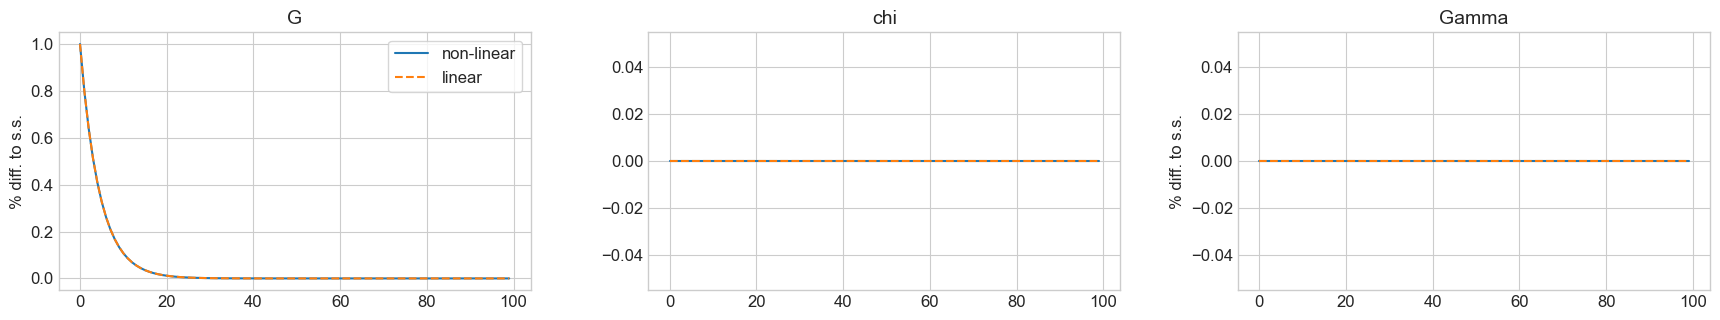


### varnames ###


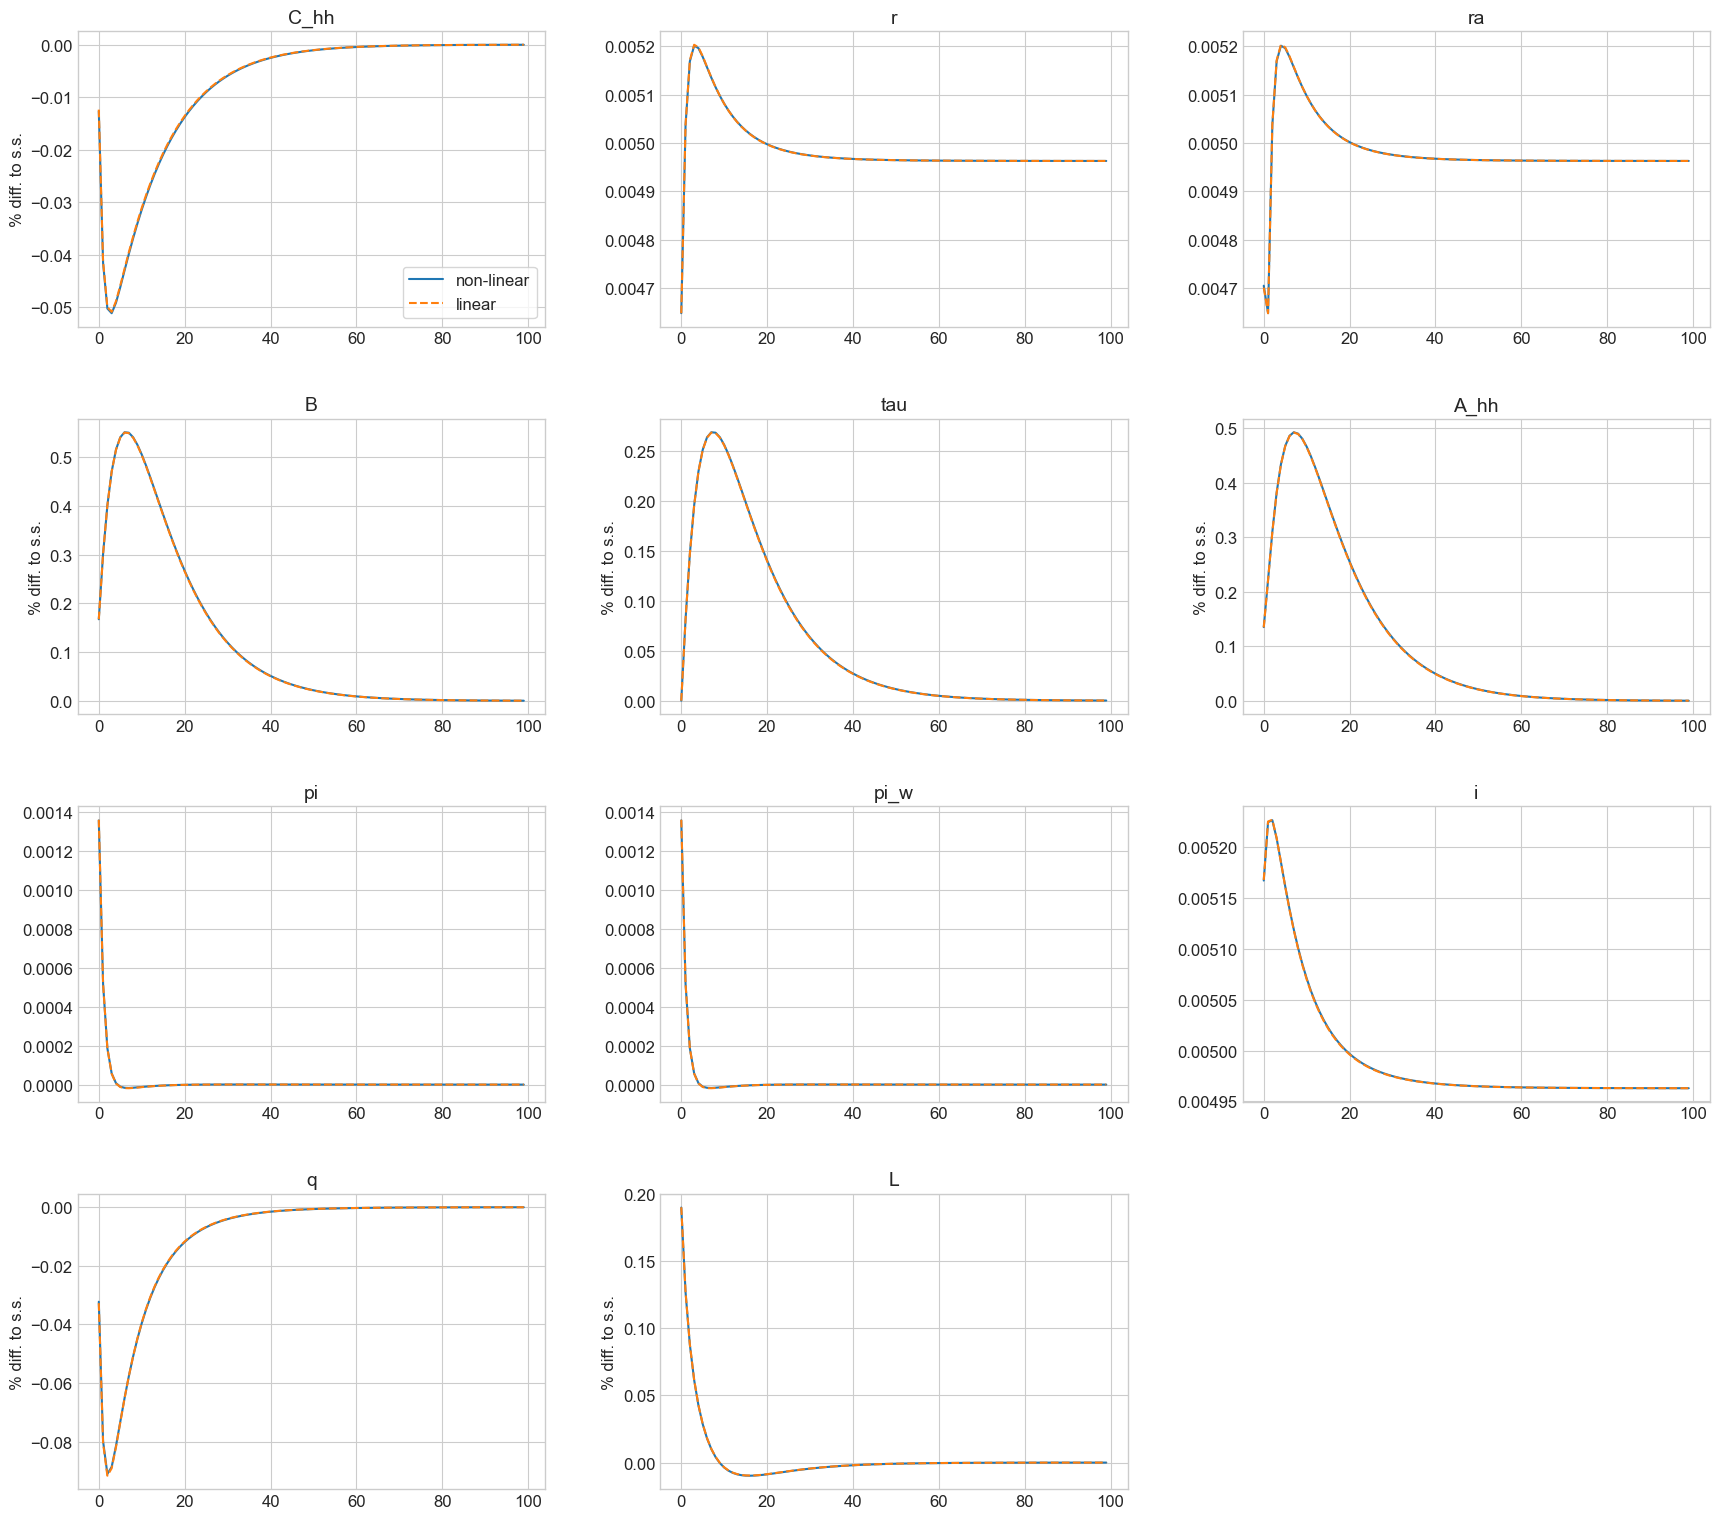


### tagets ###


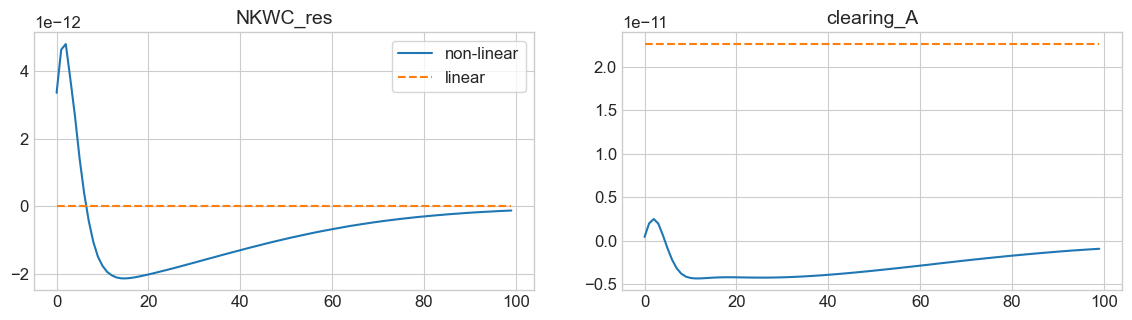

In [ ]:
model_k.show_IRFs(paths,lvl_value=lvl_value,T_max=80,ncols=3,do_linear=True)

# Question 4

In [361]:
model.par.jump_G = 0.0
model.par.rho_G = 0.0
model.par.jump_chi = 0.01 * ss.G
model.par.rho_chi = 0.8

model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.84e-02
   2.03e-03 in NKWC_res
   1.84e-02 in clearing_A
 it =   1 -> max. abs. error = 1.03e-04
   1.50e-05 in NKWC_res
   1.03e-04 in clearing_A
 it =   2 -> max. abs. error = 2.15e-06
   1.52e-07 in NKWC_res
   2.15e-06 in clearing_A
 it =   3 -> max. abs. error = 3.38e-09
   3.97e-10 in NKWC_res
   3.38e-09 in clearing_A
 it =   4 -> max. abs. error = 3.36e-12
   9.41e-13 in NKWC_res
   3.36e-12 in clearing_A

transition path found in 1.5 secs


In [362]:
model.find_IRFs(do_print=True)

linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]


### shocks ###


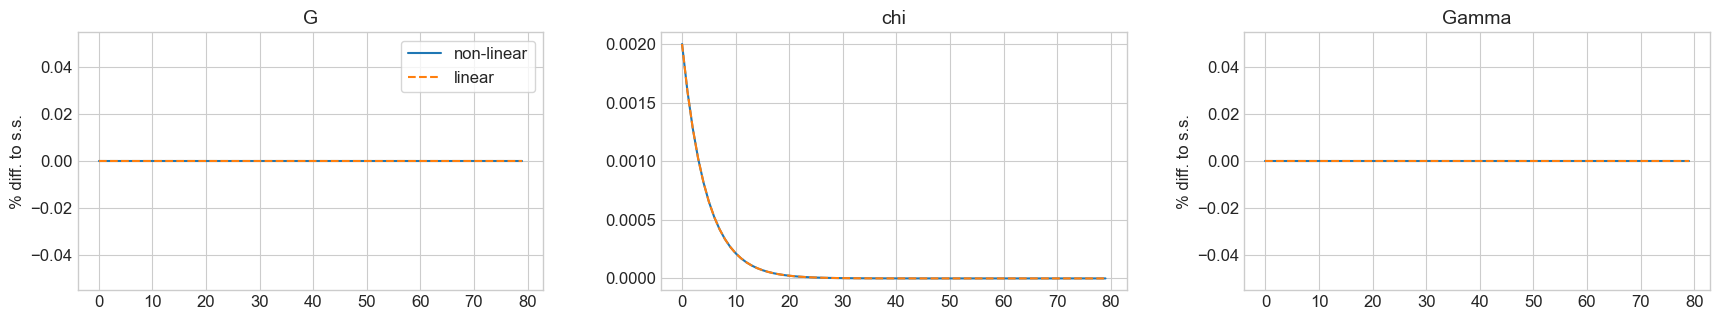


### varnames ###


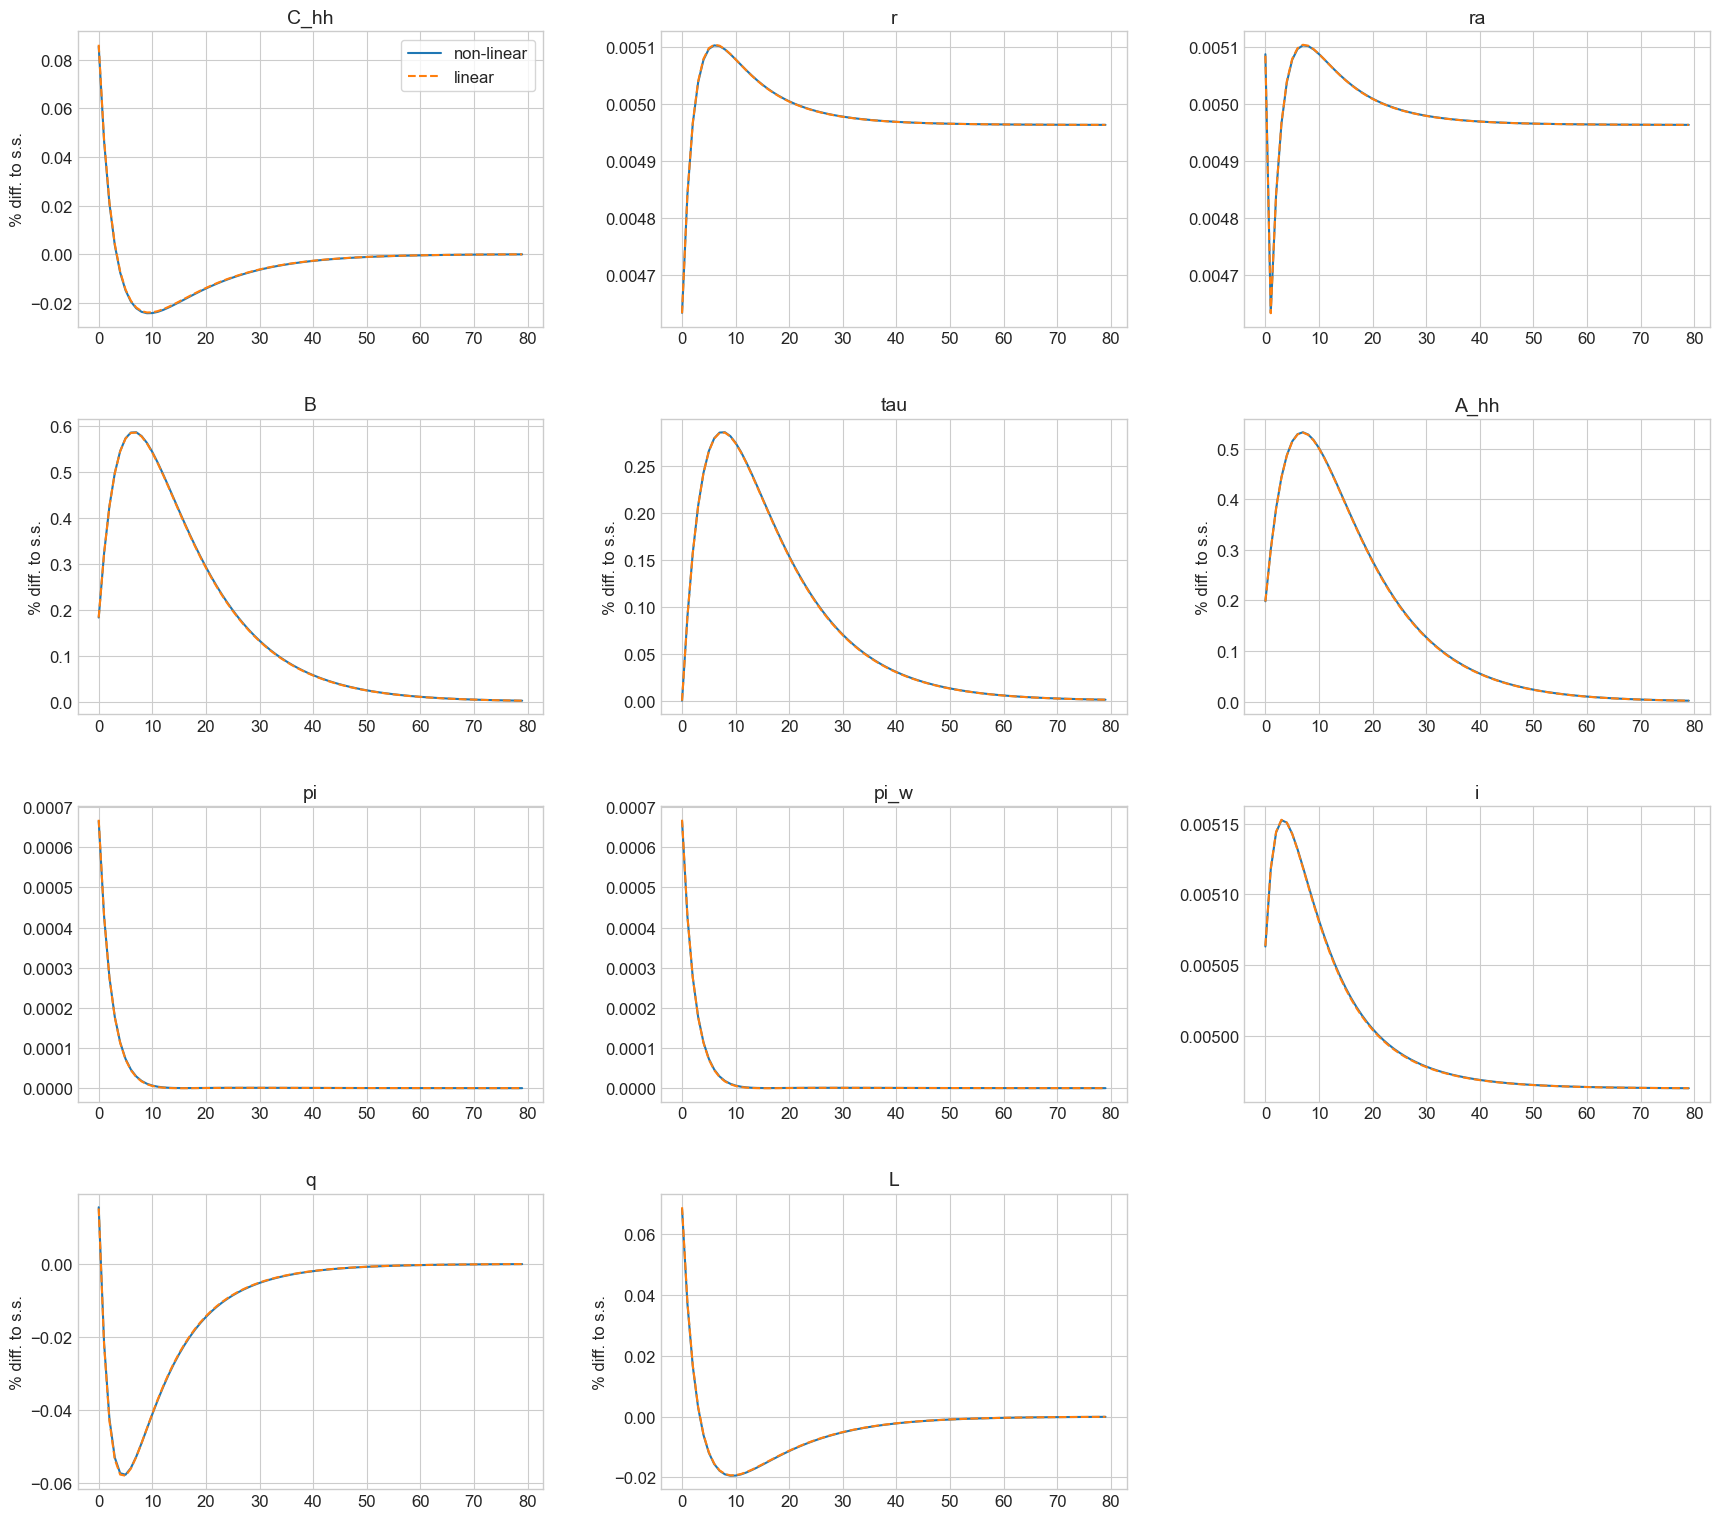


### tagets ###


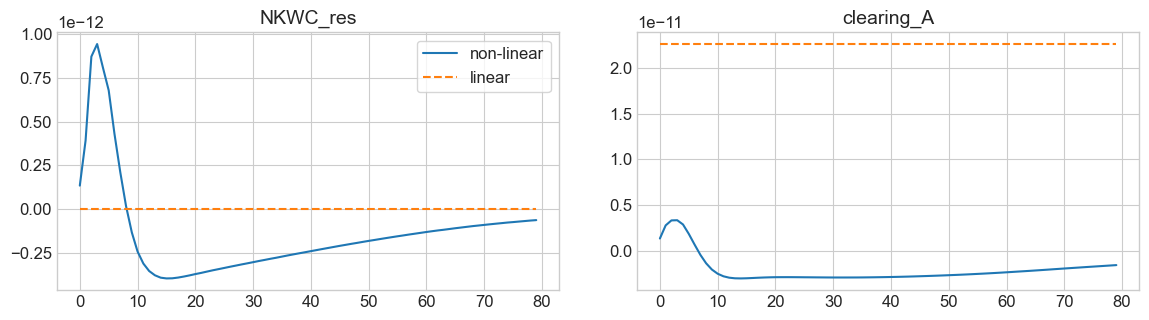

In [363]:
model.show_IRFs(paths,lvl_value=lvl_value,T_max=80,ncols=3,do_linear=True)